<a href="https://colab.research.google.com/github/ZeroOFBright/test-data-utility/blob/main/Heart_attack_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [ ]:
import pandas as pd
import numpy as np

Age : Age of the patient

Sex : Sex of the patient  sex (1 = male; 0 = female)

exang: exercise induced angina (1 = yes; 0 = no)   โรคหลอดเลือดหัวใจตีบที่เกิดจากการออกกำลังกาย

ca: number of major vessels (0-3) จำนวนเส้นเลือดที่มองเห็นจากการฉีดสี fluoroscopy

cp : Chest Pain type chest pain type

    Value 1: typical angina   โรคหลอดเลือดหัวใจตีบทั่วไป

    Value 2: atypical angina  โรคหลอดเลือดหัวใจตีบผิดปกติ

    Value 3: non-anginal pain อาการปวดไม่เจ็บหน้าอก

    Value 4: asymptomatic     ไม่มีอาการ

trtbps : resting blood pressure (in mm Hg) 

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  น้ำตาลในเลือดมากกว่า 120 mg

rest_ecg : resting electrocardiographic results

    Value 0: normal

    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 
    0= less chance of heart attack 
    1= more chance of heart attack

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Heart Attack Analysis/heart.csv")

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.rename(columns={"cp": "chest pain" , "trtbps" : "resting blood pressure", "chol" : "cholestoral in mg/dl" , "fbs" : "fasting blood sugar > 120 mg/dl" , "restecg":"resting electrocardiographic results" } )

,age,sex,chest pain,resting blood pressure,cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.groupby("output").count()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Explore data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


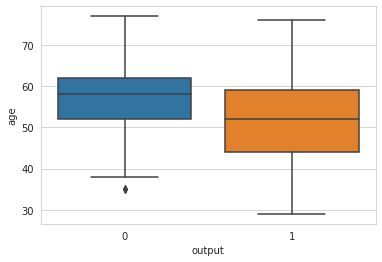

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


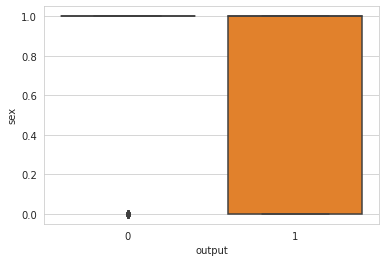

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


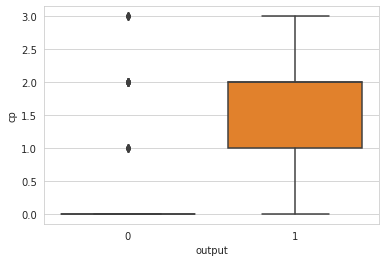

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


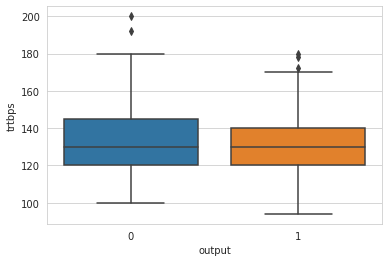

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


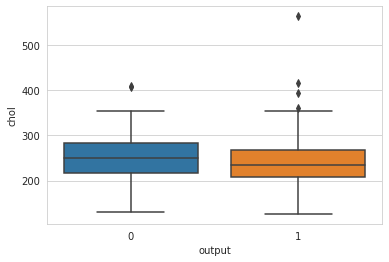

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


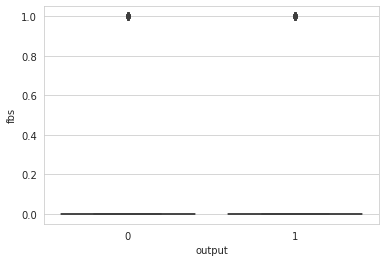

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


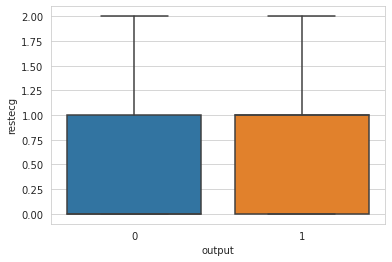

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


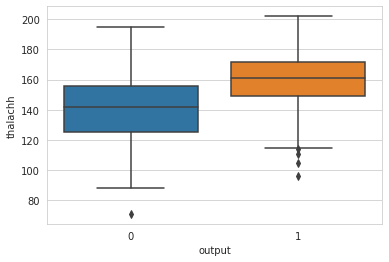

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


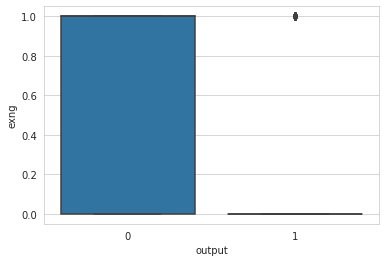

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


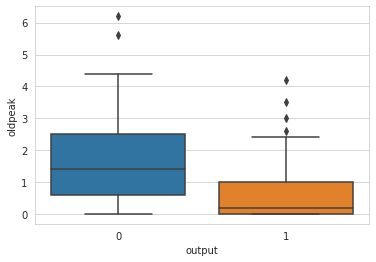

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


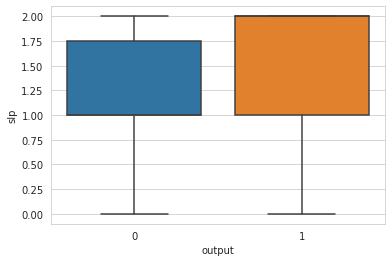

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


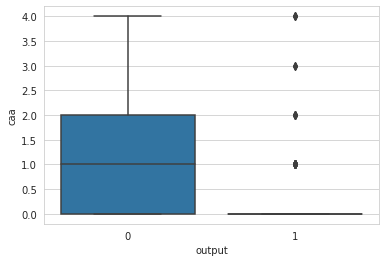

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


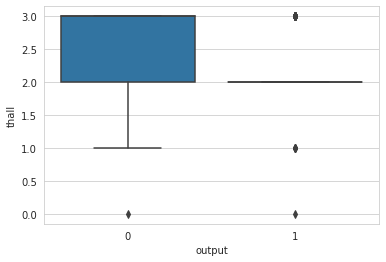

In [ ]:
def plot_box(data, cols, col_x = "output"):
  for col in cols:
    sns.set_style("whitegrid")
    sns.boxplot(col_x, col, data=data)
    plt.xlabel(col_x) # Set text for the x axis
    plt.ylabel(col)# Set text for y axis
    plt.show()

cols = ["age"	,"sex"	,"cp",	"trtbps",	"chol",	"fbs",	"restecg",	"thalachh",	"exng",	"oldpeak",	"slp",	"caa",	"thall"	]

plot_box(df,cols)

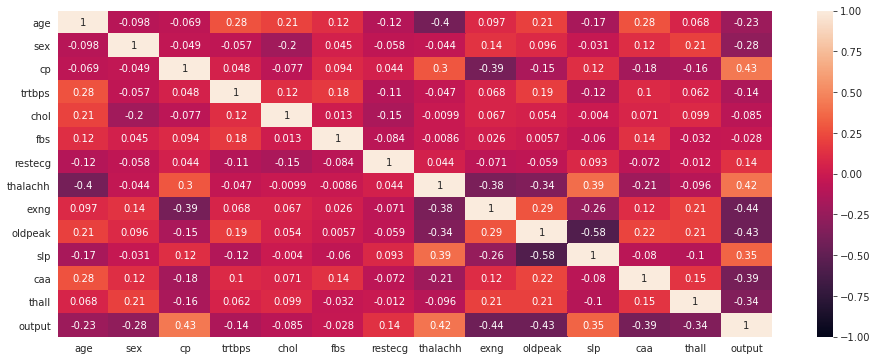

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True);


# Data Preprocessing

In [ ]:
X = df[cols]
y = df["output"]

In [ ]:
from sklearn.preprocessing import StandardScaler  # scaling data with standard scaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [ ]:
df_scaled = pd.DataFrame(X)

In [ ]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [ ]:
df_scaled.var()

0     1.003311
1     1.003311
2     1.003311
3     1.003311
4     1.003311
5     1.003311
6     1.003311
7     1.003311
8     1.003311
9     1.003311
10    1.003311
11    1.003311
12    1.003311
dtype: float64

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Model

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV  #for Tune Machine

param_grid = {"max_depth": np.arange(1, 10), "criterion":["entropy","gini"]}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
tree.fit(X_train, y_train)
tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7692307692307693
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.81      0.76      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {"n_neighbors": [3,5,7,9,11,13]  , "weights": ["uniform","distance"],  "metric" :["euclidean","manhattan"] }


knn = GridSearchCV(KNeighborsClassifier(),grid_params,cv=5)
knn.fit(X_train, y_train)
knn.best_estimator_



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators = [1,2,3,4,5]
max_depth = [2,4,6,8,10]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4] 

grid_params = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

random_forest = GridSearchCV(RandomForestClassifier(),grid_params,cv=5,return_train_score=True)

random_forest.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
y_pred = random_forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        41
           1       0.83      0.68      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

solver= ['liblinear']

# Create hyperparameter options
grid_params = dict(C=C, penalty=penalty,solver=solver)


logreg = GridSearchCV(LogisticRegression(),grid_params,cv=5,return_train_score=True)

logreg.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [ ]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



# Anonymize Data

In [ ]:
df_an = df.copy()

In [ ]:
df_an.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Generalize age 

In [ ]:
def generalize_age(x,base=10):
  return int(x // base * base)  

In [ ]:
df_an["age"] = df_an.apply(lambda x: generalize_age(x["age"]) ,axis=1 )

In [ ]:
test = df[["age"]].copy()
test["age-anonymize"] = df_an[["age"]].copy()
test

,age,age-anonymize
0,63,60
1,37,30
2,41,40
3,56,50
4,57,50
...,...,...
298,57,50
299,45,40
300,68,60
301,57,50


## Add noise to trtbps - Normal Distrubition

In [ ]:
noise_trtbps = np.random.normal(0,1,len(df_an))

In [ ]:
df_an["trtbps"] = df_an["trtbps"] + noise_trtbps
df_an["trtbps"] = df_an.apply(lambda x : round(x["trtbps"]) ,axis=1)

In [ ]:
df_an

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,30,1,2,131,250,0,1,187,0,3.5,0,0,2,1
2,40,0,1,129,204,0,0,172,0,1.4,2,0,2,1
3,50,1,1,119,236,0,1,178,0,0.8,2,0,2,1
4,50,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,50,0,0,139,241,0,1,123,1,0.2,1,0,3,0
299,40,1,3,109,264,0,1,132,0,1.2,1,0,3,0
300,60,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,50,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Add noise to chol

In [ ]:
noise_chol = np.random.normal(0,2,len(df_an))

In [ ]:
df_an["chol"] = df_an["chol"] + noise_chol
df_an["chol"] = df_an.apply(lambda x : round(x["chol"]) ,axis=1)

In [ ]:
noise_chol

array([ 3.09233428,  1.65512741,  0.89254787, -0.89512712, -0.2868359 ,
        2.49380402, -0.8640053 , -2.34515052,  0.64232917, -3.38157681,
        0.44168695,  0.21610865, -2.16567289, -1.25236546, -2.16389375,
       -0.47301952,  0.57871935, -0.96226458, -3.0444394 ,  3.54205331,
       -0.4472946 , -2.46291214,  1.52000251, -2.90065796,  1.79873376,
       -0.05578913, -1.21664767, -1.15856699,  1.57072515,  2.23952734,
       -1.00709073,  3.26871341, -1.67590453,  2.99799368, -1.49606685,
        1.33212942, -2.06851999,  1.25312708, -3.04196548,  2.96997648,
        1.46017892,  4.69918551,  4.23301075, -0.04109125, -1.34065402,
        2.48165881,  4.0852261 ,  0.23954775, -6.90149461,  2.30099271,
       -1.88781166,  1.03758002,  0.94837636,  2.19876332, -1.40132091,
       -0.03831694, -0.44692053,  1.71077414,  0.28513485,  2.13473403,
       -0.7894498 ,  0.51938796, -1.35451634,  2.98092266,  2.14586818,
        6.19916968,  1.70849675,  0.32309317, -2.30215628, -3.28

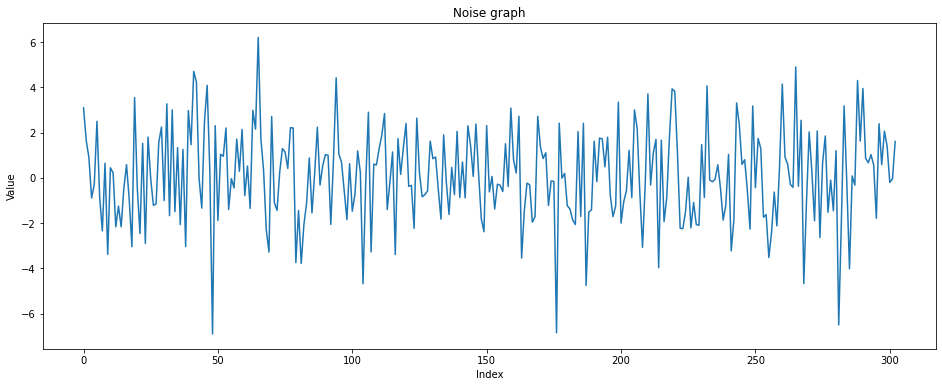

In [ ]:
plt.figure(figsize=(16, 6))

plt.title("Noise graph")

plt.xlabel("Index")

plt.ylabel("Value")

plt.plot(noise_chol)



## add noise to thalachh  - Differential Privacy

In [ ]:
noise_thalachh = np.random.normal(0,2,len(df_an))

In [ ]:
df_an["thalachh"] = df_an["thalachh"] + noise_thalachh
df_an["thalachh"] = df_an.apply(lambda x : round(x["thalachh"]) ,axis=1)

## Compare raw data and anonymize data




**TRTBPS**

In [ ]:
trtbps = df[["trtbps"]].copy()
trtbps["anonymize"] = df_an[["trtbps"]].copy()
trtbps

,trtbps,anonymize
0,145,145
1,130,131
2,130,129
3,120,119
4,120,120
...,...,...
298,140,139
299,110,109
300,144,144
301,130,130


In [ ]:
trtbps.describe()

,trtbps,anonymize
count,303.000000,303.000000
mean,131.623762,131.574257
std,17.538143,17.509702
min,94.000000,95.000000
25%,120.000000,120.000000
50%,130.000000,130.000000
75%,140.000000,140.000000
max,200.000000,200.000000


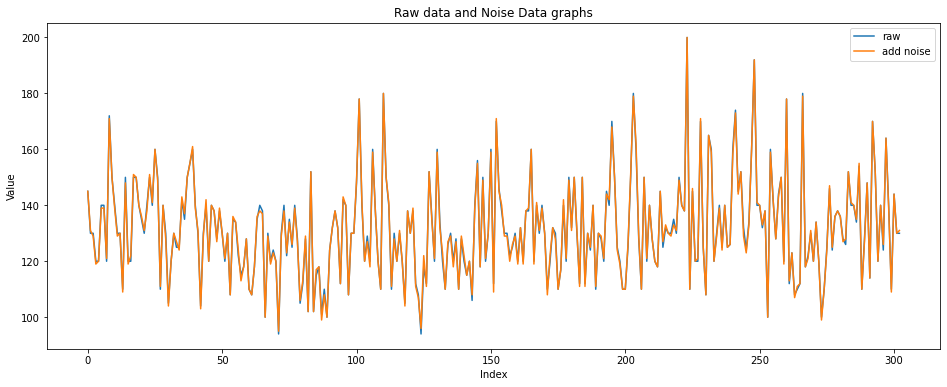

In [ ]:
from scipy.stats import norm
import statistics
  
x_axis = list(range(0, len(df), 1))

y_axis = df["trtbps"].tolist()

plt.figure(figsize=(16, 6))

plt.plot(x_axis,y_axis, label= "raw")

y_axis2 = df_an["trtbps"].tolist()



plt.plot(x_axis, y_axis2, label= "add noise")

plt.legend()

plt.title("Raw data and Noise Data graphs")

plt.xlabel("Index")

plt.ylabel("Value")

plt.show()

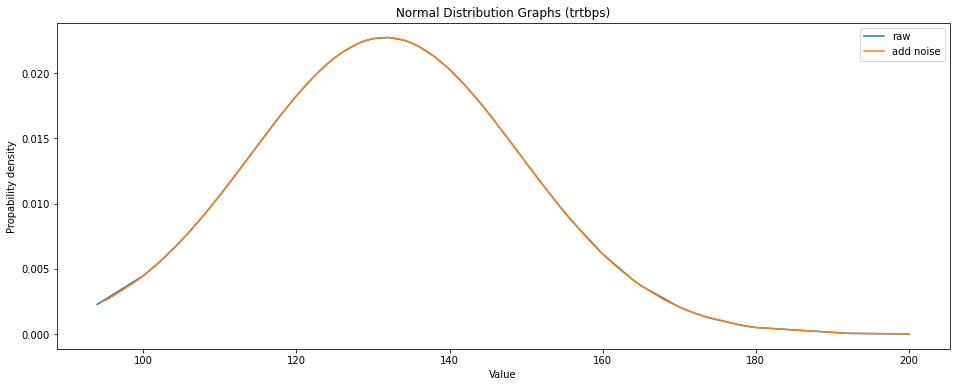

In [ ]:
from scipy.stats import norm
import statistics

x_axis = df["trtbps"].tolist()
x_axis = sorted(x_axis)

plt.figure(figsize=(16, 6))

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd), label= "raw")

x_axis2 = df_an["trtbps"].tolist()
x_axis2 = sorted(x_axis2)

# Calculating mean and standard deviation
mean2 = statistics.mean(x_axis2)
sd2 = statistics.stdev(x_axis2)

plt.plot(x_axis2, norm.pdf(x_axis2, mean, sd), label= "add noise")


plt.title("Normal Distribution Graphs (trtbps)")

plt.xlabel("Value")

plt.ylabel("Propability density")

plt.legend()
plt.show()

**CHOL**

In [ ]:
chol = df[["chol"]].copy()
chol["anonymize"] = df_an[["chol"]].copy()
chol

,chol,anonymize
0,233,236
1,250,250
2,204,205
3,236,234
4,354,354
...,...,...
298,241,241
299,264,268
300,193,193
301,131,129


In [ ]:
chol.describe()

,chol,anonymize
count,303.000000,303.000000
mean,246.264026,246.376238
std,51.830751,51.945052
min,126.000000,126.000000
25%,211.000000,209.000000
50%,240.000000,241.000000
75%,274.500000,275.000000
max,564.000000,562.000000


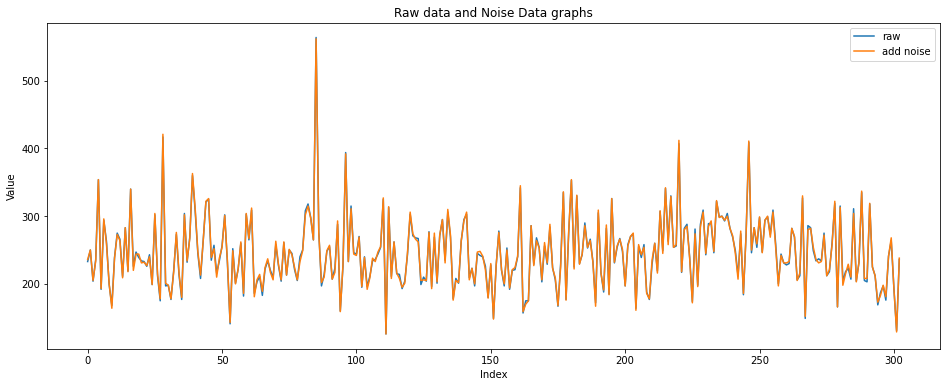

In [ ]:
from scipy.stats import norm
import statistics
  
x_axis = list(range(0, len(df), 1))

y_axis = df["chol"].tolist()

plt.figure(figsize=(16, 6))

plt.plot(x_axis,y_axis, label= "raw")

y_axis2 = df_an["chol"].tolist()



plt.plot(x_axis, y_axis2, label= "add noise")

plt.legend()

plt.title("Raw data and Noise Data graphs")

plt.xlabel("Index")

plt.ylabel("Value")

plt.show()

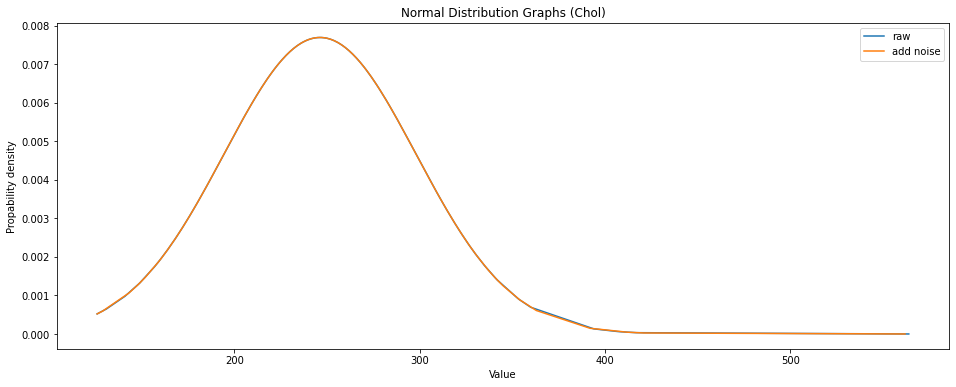

In [ ]:
from scipy.stats import norm
import statistics

x_axis = df["chol"].tolist()
x_axis = sorted(x_axis)

plt.figure(figsize=(16, 6))

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd), label= "raw")

x_axis2 = df_an["chol"].tolist()
x_axis2 = sorted(x_axis2)

# Calculating mean and standard deviation
mean2 = statistics.mean(x_axis2)
sd2 = statistics.stdev(x_axis2)

plt.plot(x_axis2, norm.pdf(x_axis2, mean, sd), label= "add noise")


plt.title("Normal Distribution Graphs (Chol)")

plt.xlabel("Value")

plt.ylabel("Propability density")

plt.legend()
plt.show()

**thalachh**

In [ ]:
thalachh = df[["trtbps"]].copy()
thalachh["anonymize"] = df_an[["trtbps"]].copy()
thalachh

,trtbps,anonymize
0,145,145
1,130,131
2,130,129
3,120,119
4,120,120
...,...,...
298,140,139
299,110,109
300,144,144
301,130,130


In [ ]:
thalachh.describe()

,trtbps,anonymize
count,303.000000,303.000000
mean,131.623762,131.574257
std,17.538143,17.509702
min,94.000000,95.000000
25%,120.000000,120.000000
50%,130.000000,130.000000
75%,140.000000,140.000000
max,200.000000,200.000000


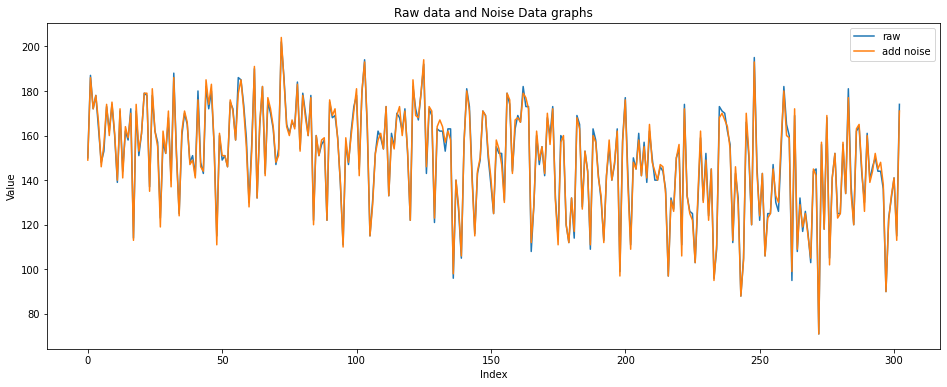

In [ ]:
from scipy.stats import norm
import statistics
  
x_axis = list(range(0, len(df), 1))

y_axis = df["thalachh"].tolist()

plt.figure(figsize=(16, 6))

plt.plot(x_axis,y_axis, label= "raw")

y_axis2 = df_an["thalachh"].tolist()



plt.plot(x_axis, y_axis2, label= "add noise")

plt.legend()

plt.title("Raw data and Noise Data graphs")

plt.xlabel("Index")

plt.ylabel("Value")

plt.show()

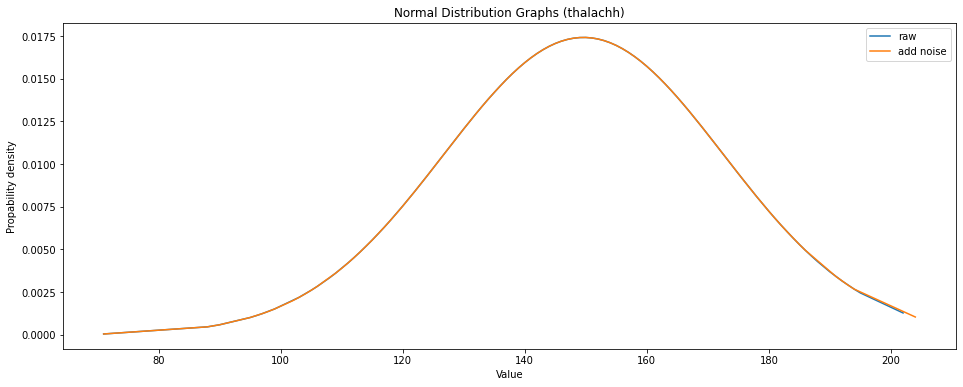

In [ ]:
from scipy.stats import norm
import statistics

x_axis = df["thalachh"].tolist()
x_axis = sorted(x_axis)

plt.figure(figsize=(16, 6))

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd), label= "raw")

x_axis2 = df_an["thalachh"].tolist()
x_axis2 = sorted(x_axis2)

# Calculating mean and standard deviation
mean2 = statistics.mean(x_axis2)
sd2 = statistics.stdev(x_axis2)

plt.plot(x_axis2, norm.pdf(x_axis2, mean, sd), label= "add noise")

plt.title("Normal Distribution Graphs (thalachh)")

plt.xlabel("Value")

plt.ylabel("Propability density")

plt.legend()
plt.show()



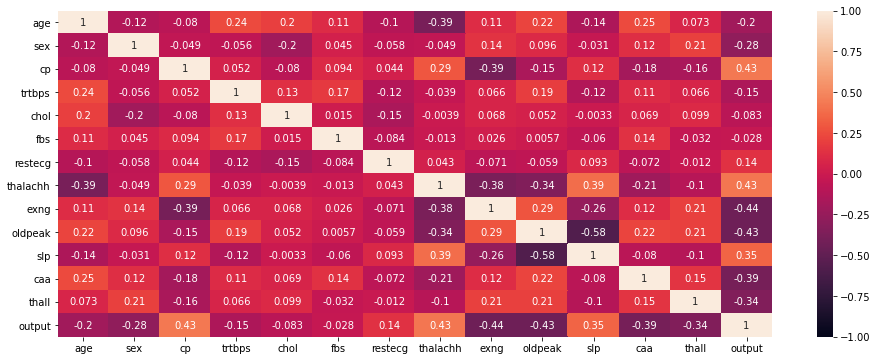

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_an.corr(),vmin=-1, vmax=1, annot=True);


# Data Preprocessing - Anonymize

In [ ]:
X_an = df_an[cols]
y_an = df_an["output"]

In [ ]:
from sklearn.preprocessing import StandardScaler  # scaling data with standard scaler
scale = StandardScaler()
X_an = scale.fit_transform(X_an)

In [ ]:
df_an_scaled = pd.DataFrame(X_an)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_an_train,X_an_test,y_an_train,y_an_test = train_test_split(X_an,y_an,test_size=0.3,random_state=42)

In [ ]:
df_an.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,236,1,0,149,0,2.3,0,0,1,1
1,30,1,2,131,250,0,1,186,0,3.5,0,0,2,1
2,40,0,1,129,205,0,0,172,0,1.4,2,0,2,1
3,50,1,1,119,234,0,1,178,0,0.8,2,0,2,1
4,50,0,0,120,354,0,1,166,1,0.6,2,0,2,1


In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Model-Anonymize

## Decision Tree - Anonymized data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV  #for Tune Machine

param_grid = {"max_depth": np.arange(1, 10), "criterion":["entropy","gini"]}

tree_an = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
tree_an.fit(X_an_train, y_an_train)
tree_an.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_an_pred = tree_an.predict(X_an_test)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_an_test, y_an_pred))
print(classification_report(y_an_test, y_an_pred))

0.7692307692307693
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.81      0.76      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



## K nearest - Anonymize data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {"n_neighbors": [3,5,7,9,11,13]  , "weights": ["uniform","distance"],  "metric" :["euclidean","manhattan"] }


knn_an = GridSearchCV(KNeighborsClassifier(),grid_params,cv=5)
model = knn_an.fit(X_an_train, y_an_train)
knn_an.best_estimator_



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_an_pred = knn_an.predict(X_an_test)
from sklearn.metrics import classification_report
print(classification_report(y_an_test, y_an_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.82      0.90      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



## Randomforest - Anonymize

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators = [1,2,3,4,5]
max_depth = [2,4,6,8,10]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4] 

grid_params = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

random_forest_an = GridSearchCV(RandomForestClassifier(),grid_params,cv=5,return_train_score=True)

random_forest_an.fit(X_an_train, y_an_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
y_an_pred = random_forest_an.predict(X_an_test)
from sklearn.metrics import classification_report
print(classification_report(y_an_test, y_an_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        41
           1       0.83      0.70      0.76        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



## Logistic Regression - Anonymize

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

solver= ['liblinear']

# Create hyperparameter options
grid_params = dict(C=C, penalty=penalty,solver=solver)


logreg_an = GridSearchCV(LogisticRegression(),grid_params,cv=5,return_train_score=True)

logreg_an.fit(X_an_train, y_an_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [ ]:
y_an_pred = logreg_an.predict(X_an_test)
from sklearn.metrics import classification_report
print(classification_report(y_an_test, y_an_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



# Compare Model

In [ ]:
!pip install pycaret


     |████████████████████████████████| 264 kB 5.2 MB/s 
     |████████████████████████████████| 105 kB 10.6 MB/s 
     |████████████████████████████████| 1.7 MB 10.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 29.4 MB/s 
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 6.8 MB 53.6 MB/s 
     |████████████████████████████████| 1.3 MB 49.9 MB/s 
     |████████████████████████████████| 271 kB 42.4 MB/s 
     |████████████████████████████████| 167 kB 49.3 MB/s 
     |████████████████████████████████| 248 kB 47.0 MB/s 
     |████████████████████████████████| 14.4 MB 62 kB/s 
     |████████████████████████████████| 675 kB 30.7 MB/s 
     |████████████████████████████████| 636 kB 35.6 MB/s 
     |███████████████████

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
clf1 = setup(data = df, target = "output")
top3_raw = compare_models(n_select = 3)



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8435,0.9197,0.8750,0.8579,0.8630,0.6795,0.6864,0.241
ridge,Ridge Classifier,0.8435,0.0000,0.8917,0.8502,0.8666,0.6765,0.6880,0.018
lda,Linear Discriminant Analysis,0.8387,0.9113,0.8917,0.8447,0.8635,0.6658,0.6779,0.021
et,Extra Trees Classifier,0.8299,0.9163,0.8667,0.8476,0.8514,0.6512,0.6626,0.472
rf,Random Forest Classifier,0.8297,0.9111,0.8833,0.8351,0.8542,0.6483,0.6619,0.489
nb,Naive Bayes,0.8201,0.9050,0.7750,0.9092,0.8284,0.6403,0.6596,0.019
gbc,Gradient Boosting Classifier,0.8154,0.8926,0.8667,0.8218,0.8392,0.6210,0.6320,0.099
ada,Ada Boost Classifier,0.8106,0.8553,0.8417,0.8335,0.8358,0.6119,0.6155,0.113
lightgbm,Light Gradient Boosting Machine,0.8011,0.8945,0.8417,0.8196,0.8262,0.5920,0.6006,0.034
knn,K Neighbors Classifier,0.7359,0.7855,0.8167,0.7492,0.7778,0.4524,0.4631,0.119


In [ ]:
top3_raw

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=3270, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=3270,
                 solver='auto', tol=0.001),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001)]

In [ ]:
xxx = pd.DataFrame(top3_raw)
xxx

,0
0,"LogisticRegression(C=1.0, class_weight=None, d..."
1,"RidgeClassifier(alpha=1.0, class_weight=None, ..."
2,"LinearDiscriminantAnalysis(n_components=None, ..."


In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
clf1 = setup(data = df_an, target = "output")
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8398,0.9005,0.8902,0.8484,0.8642,0.6681,0.6793,0.136
ridge,Ridge Classifier,0.8351,0.0000,0.8902,0.8409,0.8606,0.6580,0.6689,0.015
rf,Random Forest Classifier,0.8251,0.8808,0.8644,0.8406,0.8492,0.6386,0.6444,0.467
lda,Linear Discriminant Analysis,0.8210,0.8982,0.8735,0.8344,0.8487,0.6292,0.6403,0.017
lightgbm,Light Gradient Boosting Machine,0.8206,0.8754,0.8470,0.8590,0.8453,0.6264,0.6324,0.031
et,Extra Trees Classifier,0.8201,0.8758,0.8386,0.8478,0.8393,0.6317,0.6376,0.467
gbc,Gradient Boosting Classifier,0.7868,0.8551,0.8129,0.8303,0.8127,0.5583,0.5685,0.087
dt,Decision Tree Classifier,0.7636,0.7596,0.7803,0.8088,0.7898,0.5159,0.5213,0.017
ada,Ada Boost Classifier,0.7636,0.8148,0.8045,0.8029,0.7938,0.5102,0.5191,0.096
qda,Quadratic Discriminant Analysis,0.6461,0.6328,0.7477,0.6773,0.7002,0.2679,0.2833,0.017


# Feature Important

*Anonymized age , trtbps , chol , thalachh *   column (0,  3  , 4  ,  7)

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_an.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,144,234,1,0,151,0,2.3,0,0,1,1
1,30,1,2,129,246,0,1,190,0,3.5,0,0,2,1
2,40,0,1,130,202,0,0,172,0,1.4,2,0,2,1
3,50,1,1,121,235,0,1,177,0,0.8,2,0,2,1
4,50,0,0,121,353,0,1,161,1,0.6,2,0,2,1


## DecisionTree

Raw Data 
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.05660
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.04623
Feature: 9, Score: 0.09151
Feature: 10, Score: 0.04906
Feature: 11, Score: 0.14717
Feature: 12, Score: 0.02547
Anonymized Data 
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.04906
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.04528
Feature: 9, Score: 0.07170
Feature: 10, Score: 0.05377
Feature: 11, Score: 0.13679
Feature: 12, Score: 0.03019


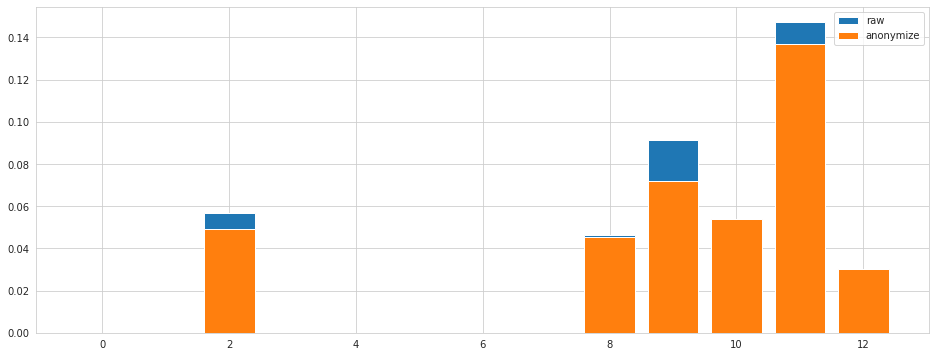

In [ ]:
# permutation feature importance with knn for classification
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# fit the model
dt.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(dt, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
print("Raw Data ")
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(16, 6))

pyplot.bar([x for x in range(len(importance))], importance , label= "raw")


# define the model
dt_an = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
# fit the model
dt_an.fit(X_an_train, y_an_train)
# perform permutation importance
results_an = permutation_importance(dt_an, X_an_train, y_an_train, scoring='accuracy')
# get importance
importance_an = results_an.importances_mean
# summarize feature importance
print("Anonymized Data ")

for i,v in enumerate(importance_an):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


pyplot.bar([x for x in range(len(importance_an))], importance_an , label = "anonymize")
pyplot.legend()
pyplot.show()

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## KNN

Raw Data 
Feature: 0, Score: 0.00377
Feature: 1, Score: 0.02642
Feature: 2, Score: 0.02736
Feature: 3, Score: 0.00472
Feature: 4, Score: -0.00094
Feature: 5, Score: 0.01226
Feature: 6, Score: -0.00755
Feature: 7, Score: -0.01038
Feature: 8, Score: 0.02736
Feature: 9, Score: -0.00377
Feature: 10, Score: 0.02264
Feature: 11, Score: 0.02075
Feature: 12, Score: 0.03774
Anonymized Data 
Feature: 0, Score: -0.00566
Feature: 1, Score: 0.03679
Feature: 2, Score: 0.02358
Feature: 3, Score: 0.00472
Feature: 4, Score: -0.00283
Feature: 5, Score: -0.00660
Feature: 6, Score: -0.00943
Feature: 7, Score: -0.00377
Feature: 8, Score: 0.02925
Feature: 9, Score: -0.00660
Feature: 10, Score: 0.01792
Feature: 11, Score: 0.03113
Feature: 12, Score: 0.04245


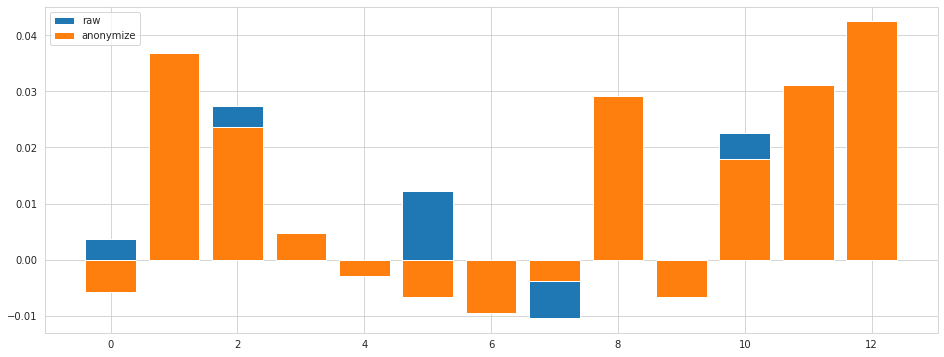

In [ ]:
# permutation feature importance with knn for classification
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

# fit the model
knn.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
print("Raw Data ")
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(16, 6))

pyplot.bar([x for x in range(len(importance))], importance , label= "raw")


# define the model
knn_an = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
# fit the model
knn_an.fit(X_an_train, y_an_train)
# perform permutation importance
results_an = permutation_importance(knn_an, X_an_train, y_an_train, scoring='accuracy')
# get importance
importance_an = results_an.importances_mean
# summarize feature importance
print("Anonymized Data ")

for i,v in enumerate(importance_an):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


pyplot.bar([x for x in range(len(importance_an))], importance_an , label = "anonymize")
pyplot.legend()
pyplot.show()

## Random Forest

Raw Data 
Feature: 0, Score: 0.01415
Feature: 1, Score: 0.00755
Feature: 2, Score: 0.06226
Feature: 3, Score: 0.00849
Feature: 4, Score: 0.01132
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00849
Feature: 7, Score: 0.01887
Feature: 8, Score: 0.01981
Feature: 9, Score: 0.01415
Feature: 10, Score: 0.02170
Feature: 11, Score: 0.08868
Feature: 12, Score: 0.06226
Anonymized Data 
Feature: 0, Score: 0.00943
Feature: 1, Score: 0.00849
Feature: 2, Score: 0.05755
Feature: 3, Score: 0.01038
Feature: 4, Score: 0.01698
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00283
Feature: 7, Score: 0.03302
Feature: 8, Score: 0.01038
Feature: 9, Score: 0.02170
Feature: 10, Score: 0.01509
Feature: 11, Score: 0.12075
Feature: 12, Score: 0.06132


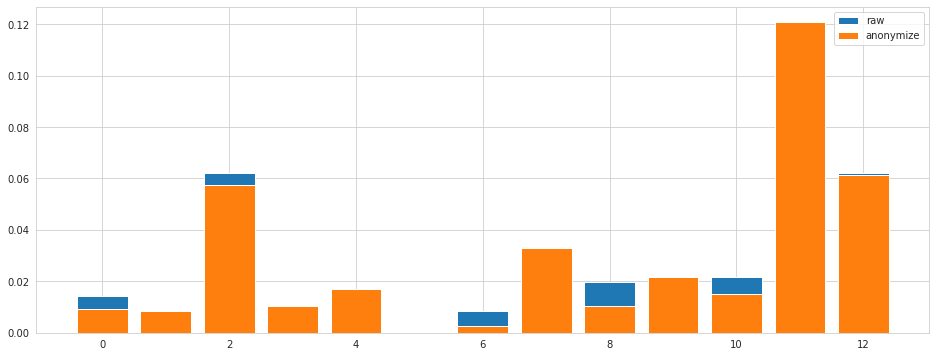

In [ ]:
# permutation feature importance with knn for classification
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

rdf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)

# fit the model
rdf.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(rdf, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
print("Raw Data ")
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(16, 6))

pyplot.bar([x for x in range(len(importance))], importance , label= "raw")


# define the model
rdf_an =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)
# fit the model
rdf_an.fit(X_an_train, y_an_train)
# perform permutation importance
results_an = permutation_importance(rdf_an, X_an_train, y_an_train, scoring='accuracy')
# get importance
importance_an = results_an.importances_mean
# summarize feature importance
print("Anonymized Data ")

for i,v in enumerate(importance_an):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


pyplot.bar([x for x in range(len(importance_an))], importance_an , label = "anonymize")
pyplot.legend()
pyplot.show()

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Logistic regression

Raw Data 
Feature: 0, Score: -0.00472
Feature: 1, Score: 0.02453
Feature: 2, Score: 0.06226
Feature: 3, Score: 0.00849
Feature: 4, Score: 0.00472
Feature: 5, Score: 0.00849
Feature: 6, Score: 0.01226
Feature: 7, Score: 0.01226
Feature: 8, Score: 0.01981
Feature: 9, Score: 0.02358
Feature: 10, Score: 0.01887
Feature: 11, Score: 0.07264
Feature: 12, Score: 0.05660
Anonymized Data 
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02736
Feature: 2, Score: 0.06415
Feature: 3, Score: 0.00472
Feature: 4, Score: -0.00189
Feature: 5, Score: 0.00472
Feature: 6, Score: 0.00849
Feature: 7, Score: 0.02736
Feature: 8, Score: 0.03774
Feature: 9, Score: 0.01509
Feature: 10, Score: 0.02736
Feature: 11, Score: 0.08585
Feature: 12, Score: 0.05566


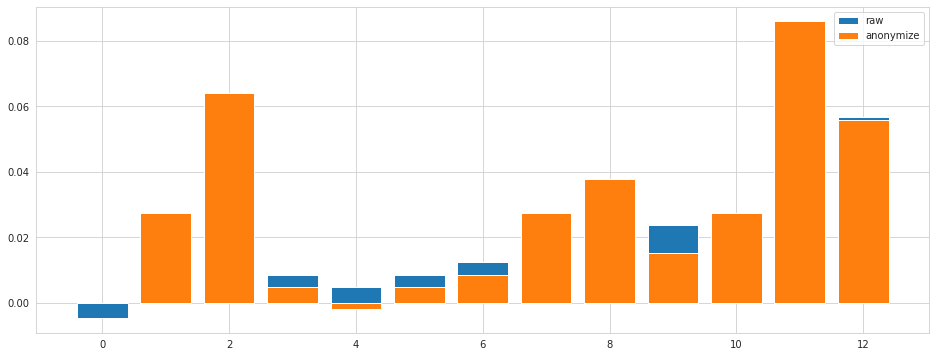

In [ ]:
# permutation feature importance with knn for classification
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

lr = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

# fit the model
lr.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(lr, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
print("Raw Data ")
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(16, 6))

pyplot.bar([x for x in range(len(importance))], importance , label= "raw")


# define the model
lr_an =  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
# fit the model
lr_an.fit(X_an_train, y_an_train)
# perform permutation importance
results_an = permutation_importance(lr_an, X_an_train, y_an_train, scoring='accuracy')
# get importance
importance_an = results_an.importances_mean
# summarize feature importance
print("Anonymized Data ")

for i,v in enumerate(importance_an):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


pyplot.bar([x for x in range(len(importance_an))], importance_an , label = "anonymize")
pyplot.legend()
pyplot.show()

# Shap

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 4.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=4c09f3c20cf9d859354b73c35d1605aa4e7e8b09d184ecb53c6bbccda913da05
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

In [ ]:
dtree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

dtree.fit(X_an_train,y_an_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
explainer = shap.KernelExplainer(dtree.predict_proba, X_an_train)
shap_values = explainer.shap_values(X_an_test)

Using 212 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_an_test)

In [ ]:
explainer2 = shap.TreeExplainer(dtree)
shap_values2 = explainer2.shap_values(X_test)

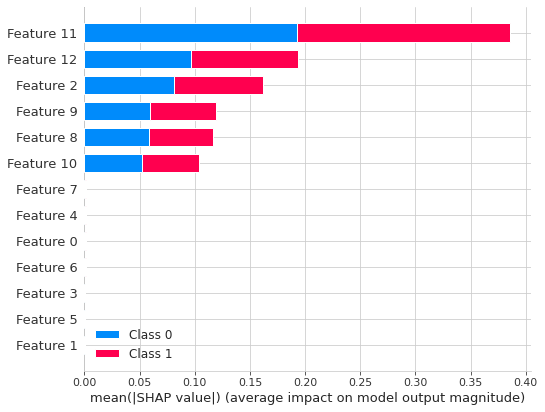

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
